In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import polars as pl
import plotly.express as px

date_parser= lambda x:datetime.strptime(x, '%Y/%m/%d %H:%M:%S:%f')
#df = pd.read_csv('VI09_2024-07-07_01-00-00_gg-44_int-2_th.csv', sep=';', parse_dates= ['time'], date_parser=date_parser, index_col='time')

#pd.to_datetime(df.index, unit='L')
#Load the csv file and use only one sensor data to downasmaple and chek the 
file_path = '/Users/thomas/Desktop/phd_unipv/Industrial_PhD/Data/20241126/csv_acc/sample_17hr_26_11_2024.parquet'

df = pl.read_parquet(file_path)

df = df.to_pandas()

In [3]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360000 entries, 0 to 359999
Columns: 107 entries, time to 0309123B_z
dtypes: float64(106), object(1)
memory usage: 293.9+ MB


Index(['time', '03091002_x', '03091003_x', '03091005_x', '03091006_x',
       '03091007_x', '03091008_x', '0309100A_x', '0309100B_z', '0309100F_x',
       ...
       '0309120A_z', '0309120B_x', '0309120C_x', '0309120D_x', '0309120E_x',
       '0309120F_x', '03091210_x', '03091211_x', '03091212_x', '0309123B_z'],
      dtype='object', length=107)

<Axes: >

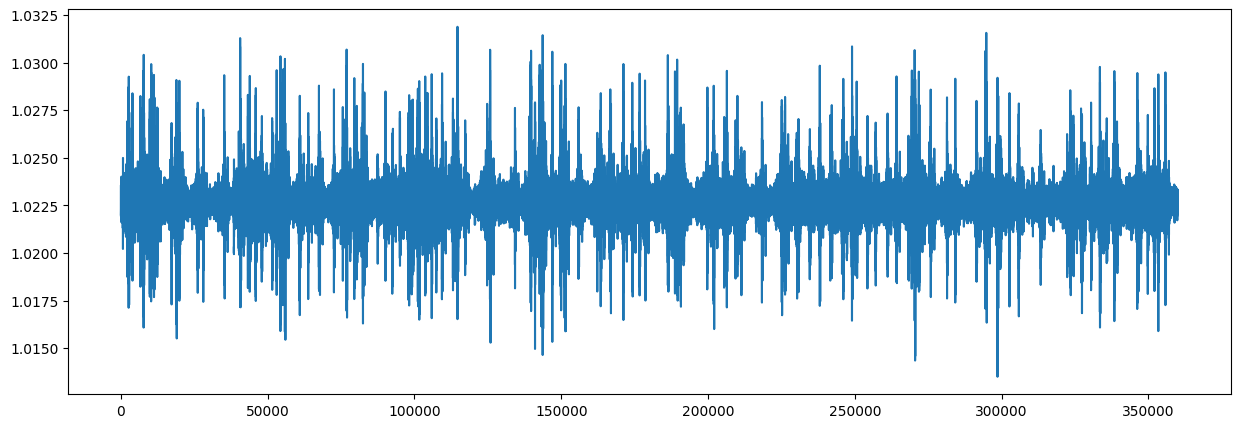

In [4]:
df.head()
df['03091002_x'].plot(figsize=(15,5))


In [5]:
#simple movinng average with rolling window
df['03091002_x_5_window_rolling'] = df['03091002_x'].rolling(window=5, min_periods=2).mean()

df[['time', '03091002_x', '03091002_x_5_window_rolling']].head(15)

,time,03091002_x,03091002_x_5_window_rolling
0,2024/11/26 17:00:00:000,1.022032,NaN
1,2024/11/26 17:00:00:010,1.022589,1.022311
2,2024/11/26 17:00:00:020,1.023189,1.022603
3,2024/11/26 17:00:00:030,1.022772,1.022645
4,2024/11/26 17:00:00:040,1.022062,1.022529
5,2024/11/26 17:00:00:050,1.022537,1.022630
6,2024/11/26 17:00:00:060,1.023566,1.022825
7,2024/11/26 17:00:00:070,1.022579,1.022703
8,2024/11/26 17:00:00:080,1.021925,1.022534
9,2024/11/26 17:00:00:090,1.022843,1.022690


ValueError: Length mismatch: Expected axis has 2000 elements, new values have 360000 elements

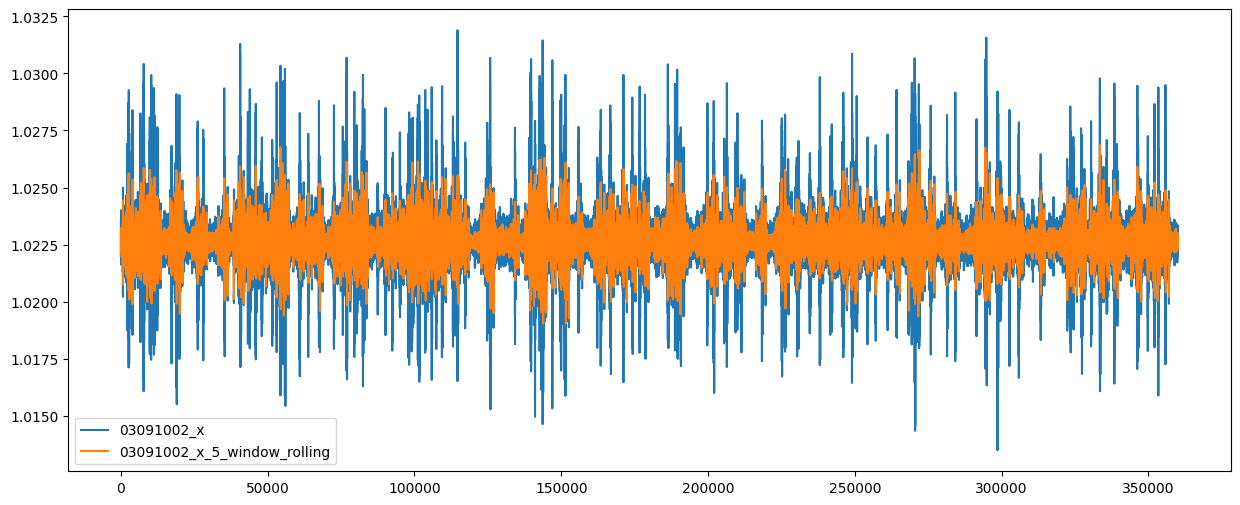

In [15]:
df_sensor = df[['time', '03091002_x','03091002_x_5_window_rolling']]
df_sensor.plot(figsize=(15,6))
df_sensor.head()


fig = px.line(df_sensor[:2000], x="time", y=df_sensor['03091002_x'])
fig.update_xaxes(minor=dict(ticks="inside", showgrid=True))
# # # fig.update_xaxes(
# #     dtick="M1",
# #     tickformat="%b\n%Y",
# #     ticklabelmode="period")
fig.show()

In [7]:
#cummulative moving average (expanding)

df2['first sensor: cummulative average'] = df2['03067802_z'].expanding().mean()

df2[['03067802_z','first sensor: cummulative average']].plot(figsize=(15,6))

NameError: name 'df2' is not defined

<AxesSubplot: xlabel='time'>

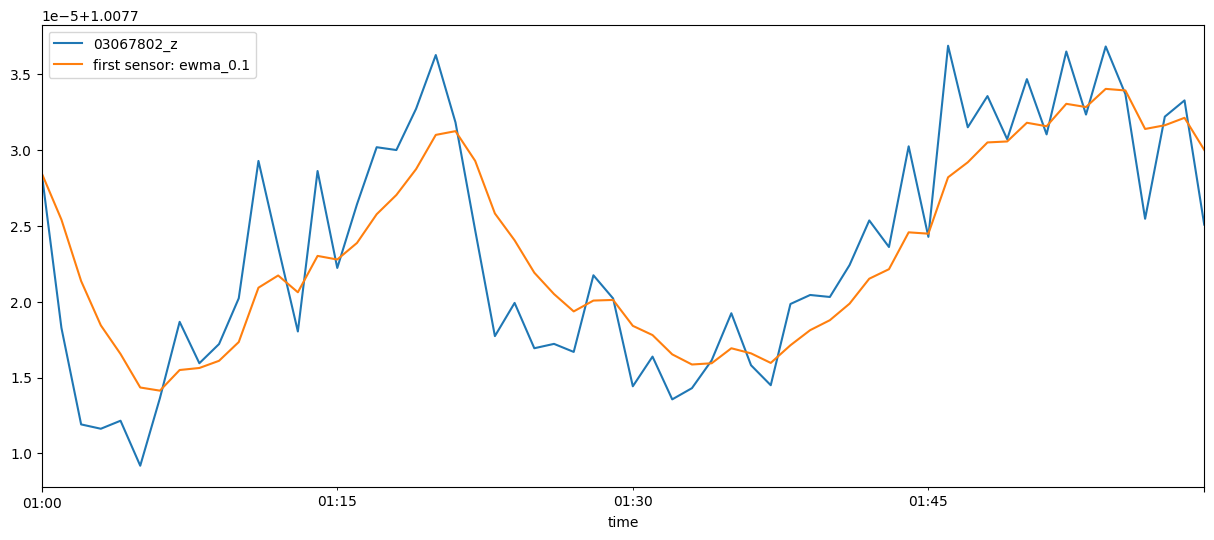

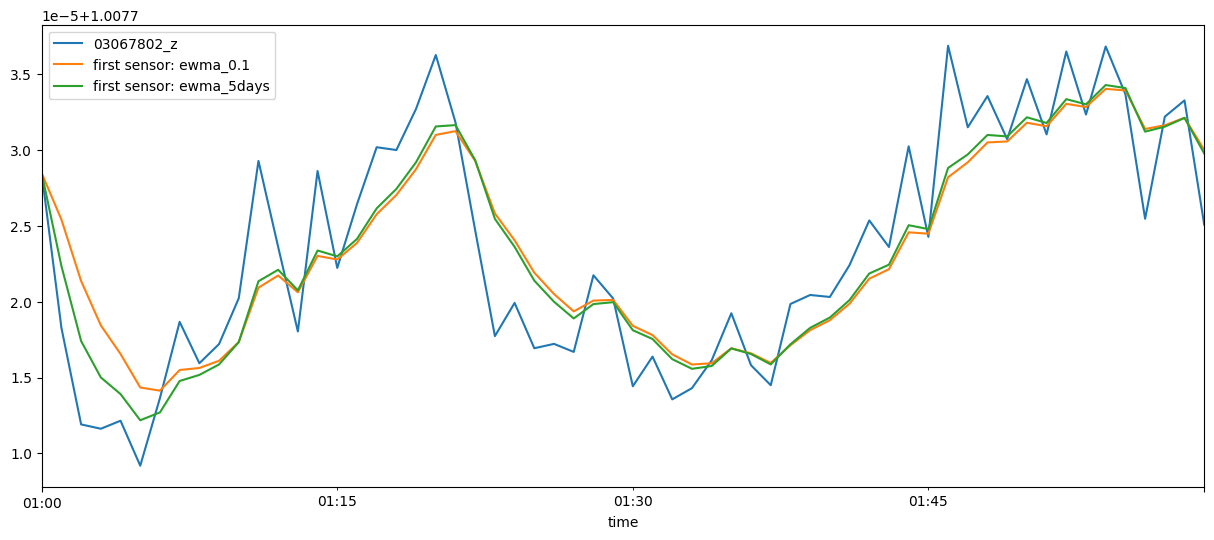

In [ ]:
#exponential moving average _EWMA-ewma
#with a smoothinf factor alpha = 0.1
df2['first sensor: ewma_0.1'] = df2['03067802_z'].ewm(alpha=0.3, adjust = False).mean()

df2[['03067802_z','first sensor: ewma_0.1']].plot(figsize=(15,6))

#using span parameter which is the multiplaction factor 2/(window+1), lets say window =5

df2['first sensor: ewma_5min'] = df2['03067802_z'].ewm(span=5).mean()

df2[['03067802_z','first sensor: ewma_0.1', 'first sensor: ewma_5min']].plot(figsize=(15,6))



In [ ]:
dr= pd.date_range('2024-07-07 00:00:00', '2024-07-07 00:19:59.995', freq='ms')


,0
0,2024-07-07 00:00:00.000
1,2024-07-07 00:00:00.001
2,2024-07-07 00:00:00.002
3,2024-07-07 00:00:00.003
4,2024-07-07 00:00:00.004
...,...
1199991,2024-07-07 00:19:59.991
1199992,2024-07-07 00:19:59.992
1199993,2024-07-07 00:19:59.993
1199994,2024-07-07 00:19:59.994
